# Auto regressor

This notebook shows how to use auto_regressor.py, the simply Python function that allows the user to fit an OLS with lagged variables.

The function does the following:

In general, the code automatically finds the best model available for the specified (lags of) variables. More specifically, for a given set of variables, the code does backward selection: remove the (lag of) variable with the highest p-value, then re-run the model, remove the least significant variable. This process continues until the p-values of all (lags of) variables are below the specified threshold (*p_cutoff* default is 0.05).

To ensure that model selection is robust, there is the option to fit the model across multiple sub-samples ('splits') of the data. Across each split, the model will be fitted. Please note that the data is split before lags are added to avoid look-ahead bias. 

Each split is divided into a 'training set', on which the model is fitted as well as a 'test set', on which the model is tested (but not fitted). *train_share* is 0.8 by default. 

The output of the function is the following (in order of output):
1. Out-of-sample model performance across splits: R2, MAE, MSE, RMSE, start date and end date
2. a Pandas dataframe with the out-of-sample values across each split. This allows us to answer: how well does the model perform out-of-sample across different periods?
3. model summary for each training split as well as the full sample: coefficients etc.
4. a Pandas dataframe that contains the model from each split, *fitted to the* **full dataset**. This answers the question: how well does a model fit on 2010-2015 data perform during 2021-2023?

In [33]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')
from stargazer.stargazer import Stargazer, LineLocation

from auto_regressor import data_preparation_splits, regression_OLS, full_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
df = regression_OLS("uk_data.csv", lags = 5, splits = 5, train_share = 0.8, p_cutoff = 0.05)

In [43]:
df[3]

,split_1_y_fitted,split_2_y_fitted,split_3_y_fitted,split_4_y_fitted,split_5_y_fitted,y_fitted_ave,y,y_full_fitted
date,,,,,,,,
2007-07-31,-0.089542,-0.023156,0.215342,0.214714,0.030744,0.109411,0.000000,-0.093623
2007-08-31,0.356017,-0.068982,0.247410,0.386697,0.071177,0.159076,0.582072,-0.087991
2007-09-30,0.167113,-0.017640,0.087253,0.109269,0.168142,0.086756,0.115741,0.205512
2007-10-31,0.078440,0.093112,0.215564,0.207764,-0.355859,0.040145,-0.346821,-0.109508
2007-11-30,0.400974,0.147429,0.342838,0.337700,0.224271,0.263060,0.580046,-0.232638
...,...,...,...,...,...,...,...,...
2023-01-31,0.484270,0.224421,0.328179,0.333941,0.163151,0.262423,0.490677,-0.208946
2023-02-28,0.539796,-0.004620,0.112400,-0.212548,0.510436,0.101417,0.195312,0.250544
2023-03-31,0.295661,0.114545,0.193670,0.117981,0.176553,0.150687,-0.292398,-0.019489


In [22]:
df[2]

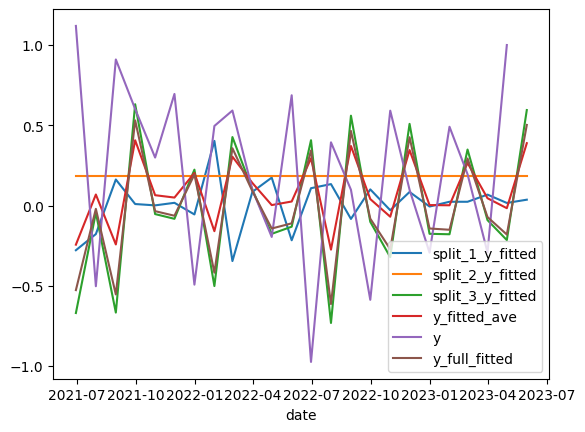

In [8]:
df[3].tail(24).plot();

In [28]:
print(df[0])
print(df[1])
df[2]
print(df[3])


+------------------------------------------------------+
| *** OUT OF SAMPLE PERFORMANCE ACROSS SUB-PERIODS *** |
+------------+------------+------------+---------------+
|            |   Sample 1 |   Sample 2 |      Sample 3 |
+------------+------------+------------+---------------+
| R2         |    -0.4032 |    -0.1097 |       -1.2228 |
| Mae        |     0.3718 |     0.2861 |        0.5258 |
| Mse        |     0.2432 |     0.1135 |        0.4294 |
| Rmse       |     0.4932 |     0.3370 |        0.6553 |
| Start Date | 31/07/2010 | 30/09/2016 |    31/10/2022 |
| End Date   | 28/02/2011 | 30/04/2017 |    30/04/2023 |
+------------+------------+------------+---------------+
            split_1_y_fitted  split_2_y_fitted  split_3_y_fitted
date                                                            
2006-01-31          0.048846               NaN               NaN
2006-02-28          0.853289               NaN               NaN
2006-03-31          0.266493               NaN          

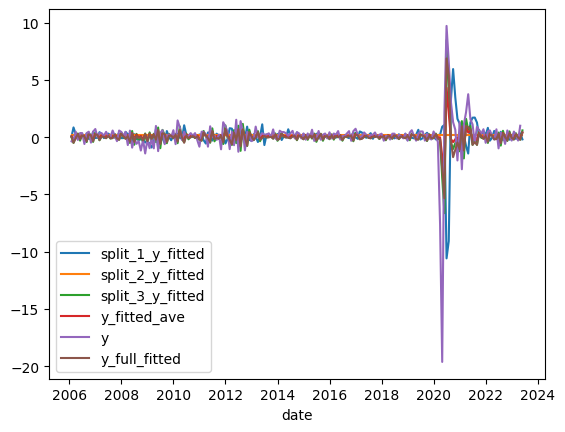

In [29]:

df[3].plot();
